## SPARK FOUNDATION TASK 1: PREDICTING USING SUPERVISED MODEL 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [4]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


CHECKING FOR NULL VALUES

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

As there is no null values we can proceed further 

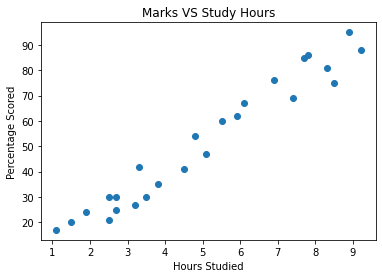

In [13]:
plt.scatter(x= df['Hours'], y= df['Scores'])
plt.title('Marks VS Study Hours')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')

plt.show()

NOTE: As per the above plot the Hours studied  and marks scored have positive Corelation. 

Plotting regression line to confirm the regression 

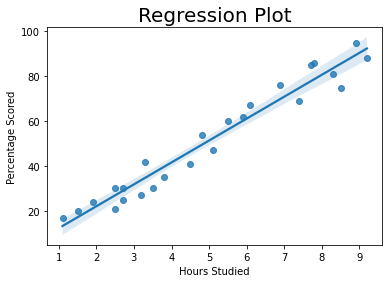

In [22]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=20)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()


In [21]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Highly Corelated 

SPLITTING THE DATA 

In [40]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [43]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

TRAINING THE DATA 

In [45]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

LinearRegression()

In [47]:
lr.intercept_

2.018160041434683

In [48]:
lr.coef_

array([9.91065648])

line = mx+c 

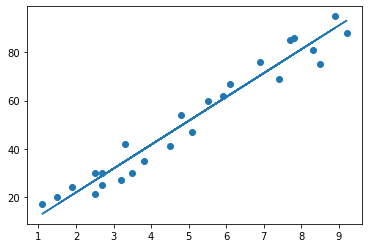

In [52]:
line = lr.coef_*X + lr.intercept_

plt.scatter(X,y)
plt.plot(X,line);
plt.show()

PREDICTING

In [55]:
y_pred = lr.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

ACTUAL VS PREDICTED 

In [62]:
s= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
s

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


EVALUATING THE MODEL (Mean Absolute Method)

In [83]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_pred)
print("The mean absolute error is ", MAE)

The mean absolute error is  4.183859899002975


Checking for 9.25 hour

In [84]:
hour = [9.25]
marks = lr.predict([hour])
print("Percentage scored after 9.25 hours of study is ", round(marks[0],2))

Percentage scored after 9.25 hours of study is  93.69


The Conclusion is if the student studies for 9.25 hours, the percentage score will 93.69 